In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
import argparse
import numpy as np
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


notebook_dir = os.getcwd()
target_path = os.path.abspath(os.path.join(notebook_dir, '../Python_Code'))
sys.path.append(target_path)
from dataGenerator import DataGenerator

import util

# Constants
num_classes = 20
window_size = 50
epoch = 15

In [8]:
def evaluate_subject_with_data_from(train_environment, train_monitor, test_environment, test_monitor, nr_subcarriers=242):
  model_dir = f'../Data/fine_grained/{train_environment}/80MHz/3mo/{train_monitor}/{train_environment}_{train_monitor}_{train_environment}_{train_monitor}_{nr_subcarriers}.h5'
  model = load_model(model_dir)

  test_dir = f'../Data/fine_grained/{test_environment}/80MHz/3mo/{test_monitor}/Slots/Test'
  test_csv = os.path.join(test_dir, 'test_set.csv')
  window_size = 50
  labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']

  test_gen = DataGenerator(test_dir, test_csv, nr_subcarriers, len(labels), (window_size, nr_subcarriers, 2), batchsize=64, shuffle=False)

  final_loss, final_accuracy = model.evaluate(test_gen)
  return final_loss, final_accuracy

In [9]:
train_environments = ['Classroom', 'Office']
train_monitors = ['m1', 'm2', 'm3']

test_environments  = ['Classroom', 'Office']
test_monitors  = ['m1', 'm2', 'm3']

results = {'train_environments': [], 'train_monitors': [], 'test_environments': [], 'test_monitors': [], 'final_loss': [], 'final_accuracy': []}
for train_environment in train_environments:
  for train_monitor in train_monitors:
    for test_environment in test_environments:
      for test_monitor in test_monitors:
        print(f"Evaluating {train_environment} {train_monitor} against {test_environment} {test_monitor}")
        final_loss, final_accuracy = evaluate_subject_with_data_from(train_environment, train_monitor, test_environment, test_monitor)
        results['train_environments'].append(train_environment)
        results['train_monitors'].append(train_monitor)
        results['test_environments'].append(test_environment)
        results['test_monitors'].append(test_monitor)
        results['final_loss'].append(final_loss)
        results['final_accuracy'].append(final_accuracy)


Evaluating Classroom m1 against Classroom m1


I0000 00:00:1747914574.396735 1647671 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747914574.647861 1647671 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747914574.653210 1647671 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747914574.660936 1647671 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

  5/308 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 1.0000 - loss: 0.0078

I0000 00:00:1747914576.730973 2244879 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.9736 - loss: 0.1137


Evaluating Classroom m1 against Classroom m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.0393 - loss: 11.8611
Evaluating Classroom m1 against Classroom m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


305/305 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.0520 - loss: 13.9568
Evaluating Classroom m1 against Office m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.0336 - loss: 15.8602
Evaluating Classroom m1 against Office m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


488/488 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.0515 - loss: 17.7500
Evaluating Classroom m1 against Office m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.0296 - loss: 13.3165
Evaluating Classroom m2 against Classroom m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


308/308 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0563 - loss: 43.4522
Evaluating Classroom m2 against Classroom m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9338 - loss: 0.2186
Evaluating Classroom m2 against Classroom m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


305/305 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.0570 - loss: 37.5172
Evaluating Classroom m2 against Office m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.0811 - loss: 36.7212
Evaluating Classroom m2 against Office m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


488/488 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.0413 - loss: 17.8432
Evaluating Classroom m2 against Office m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.0466 - loss: 22.4244
Evaluating Classroom m3 against Classroom m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


308/308 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.2135 - loss: 27.3448
Evaluating Classroom m3 against Classroom m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.0148 - loss: 35.2395
Evaluating Classroom m3 against Classroom m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


305/305 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9841 - loss: 0.0493
Evaluating Classroom m3 against Office m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.0205 - loss: 29.6110
Evaluating Classroom m3 against Office m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


488/488 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.0174 - loss: 19.2483
Evaluating Classroom m3 against Office m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.0138 - loss: 17.2182
Evaluating Office m1 against Classroom m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


308/308 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.0422 - loss: 45.0277
Evaluating Office m1 against Classroom m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.0516 - loss: 31.3160
Evaluating Office m1 against Classroom m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


305/305 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.0239 - loss: 29.2287
Evaluating Office m1 against Office m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9855 - loss: 0.0563
Evaluating Office m1 against Office m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


488/488 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.0506 - loss: 32.5585
Evaluating Office m1 against Office m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.0117 - loss: 27.4081
Evaluating Office m2 against Classroom m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


308/308 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.1479 - loss: 66.4683
Evaluating Office m2 against Classroom m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0275 - loss: 37.1261
Evaluating Office m2 against Classroom m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


305/305 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0082 - loss: 55.9687
Evaluating Office m2 against Office m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.0844 - loss: 44.2572
Evaluating Office m2 against Office m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


488/488 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9028 - loss: 0.4161
Evaluating Office m2 against Office m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.1830 - loss: 31.7032
Evaluating Office m3 against Classroom m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


308/308 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.0505 - loss: 47.3872
Evaluating Office m3 against Classroom m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0602 - loss: 41.6524
Evaluating Office m3 against Classroom m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


305/305 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0606 - loss: 48.0941
Evaluating Office m3 against Office m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.0323 - loss: 51.3416
Evaluating Office m3 against Office m2


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


488/488 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.0556 - loss: 31.1565
Evaluating Office m3 against Office m3


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9704 - loss: 0.0943


In [10]:
results_df = pd.DataFrame(results)
results_df.to_csv('SAIDAS/01-results_fine_grained.csv', index=False)
results_df

,train_environments,train_monitors,test_environments,test_monitors,final_loss,final_accuracy
0,Classroom,m1,Classroom,m1,0.141291,0.965351
1,Classroom,m1,Classroom,m2,11.805790,0.055191
2,Classroom,m1,Classroom,m3,11.811633,0.087602
3,Classroom,m1,Office,m1,14.996040,0.055095
4,Classroom,m1,Office,m2,18.573046,0.056224
5,Classroom,m1,Office,m3,12.357594,0.057451
6,Classroom,m2,Classroom,m1,40.302887,0.082894
7,Classroom,m2,Classroom,m2,0.123919,0.960593
8,Classroom,m2,Classroom,m3,32.196171,0.098053
9,Classroom,m2,Office,m1,37.394539,0.059303


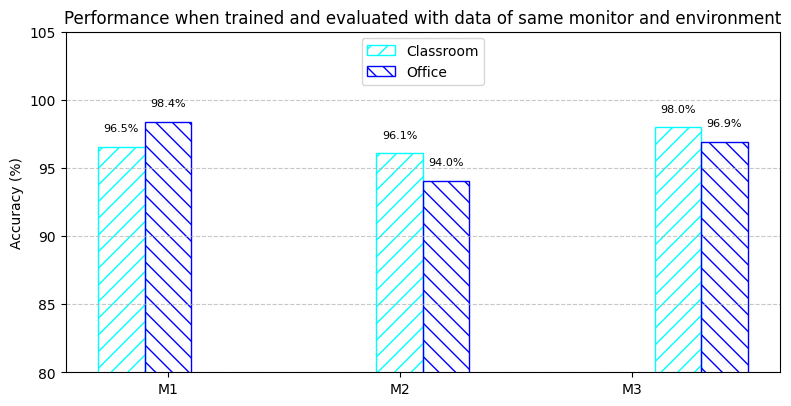

,train_environments,train_monitors,test_environments,test_monitors,final_loss,final_accuracy
0,Classroom,m1,Classroom,m1,0.141291,0.965351
7,Classroom,m2,Classroom,m2,0.123919,0.960593
14,Classroom,m3,Classroom,m3,0.066077,0.979662
21,Office,m1,Office,m1,0.067035,0.983625
28,Office,m2,Office,m2,0.231735,0.940478
35,Office,m3,Office,m3,0.094761,0.969262


In [88]:
def plot_fig12(df):
  df = df.loc[(df['train_environments']==df['test_environments'])&(df['train_monitors'] == df['test_monitors'])]

  # Configurações
  train_environments = ['Classroom', 'Office']
  train_monitors = ['m1', 'm2', 'm3']
  hatches = ['//', '\\\\']  # Padrões de hachura
  colors = ['cyan', 'blue']  # Cores de contorno
  bar_width = 0.2

  x = np.arange(len(train_monitors))  

  fig, ax = plt.subplots(figsize=(8, 4))

  # Plot
  for i, train_monitor in enumerate(train_monitors):
    for j, train_environment in enumerate(train_environments):
      accuracy = df[(df['train_monitors'] == train_monitor) & (df['train_environments'] == train_environment)]['final_accuracy'].item() * 100
      # print( f"Accuracy for {train_environment} {train_monitor}: {accuracy}")
      bars = ax.bar(i + i*bar_width + j*bar_width, accuracy, width=bar_width,  hatch=hatches[j], color='none', edgecolor=colors[j])

      # Adicionar o valor percentual acima de cada barra
      for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

  # Customizações
  ax.set_ylabel('Accuracy (%)')
  ax.set_xticks(x + bar_width)
  ax.set_xticklabels(['M1', 'M2', 'M3'])
  ax.legend(labels=train_environments, loc='upper center')
  ax.set_ylim(80, 105)
  ax.grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.title('Performance when trained and evaluated with data of same monitor and environment')
  plt.show()
  display(df)


plot_fig12(results_df)


no artigo:
**IV. E XPERIMENTAL E VALUATION**
**B. Performance Evaluation of SiMWiSense**

>The simultaneous multi-subject activity classiﬁcation performance of SiMWiSense with baseline CNN is presented in
Figure 12. The average accuracy in the environments: ofﬁce, classroom and kitchen are 98.51%, 97.37% and 97.49% respectively which follows the similar trend in performance depicting the stability and robustness of SiMWiSense. Moreover, the performance discrepancy of monitors M1, M2 and M3 are less than 2% achieving an average accuracy of 98.0%, 96.84% and 98.54% respectively with M1, M2 and M3.

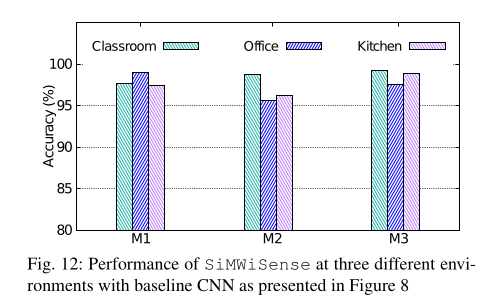

In [90]:
df = results_df.copy()
df

,train_environments,train_monitors,test_environments,test_monitors,final_loss,final_accuracy
0,Classroom,m1,Classroom,m1,0.141291,0.965351
1,Classroom,m1,Classroom,m2,11.805790,0.055191
2,Classroom,m1,Classroom,m3,11.811633,0.087602
3,Classroom,m1,Office,m1,14.996040,0.055095
4,Classroom,m1,Office,m2,18.573046,0.056224
5,Classroom,m1,Office,m3,12.357594,0.057451
6,Classroom,m2,Classroom,m1,40.302887,0.082894
7,Classroom,m2,Classroom,m2,0.123919,0.960593
8,Classroom,m2,Classroom,m3,32.196171,0.098053
9,Classroom,m2,Office,m1,37.394539,0.059303


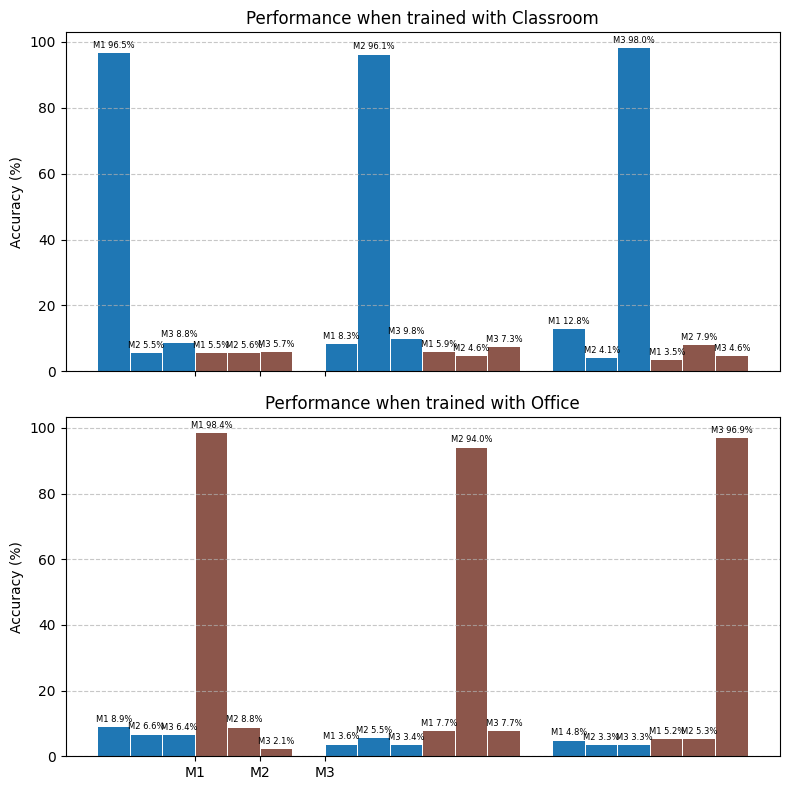

In [180]:
def plot_all(df):

  # Configurações
  train_environments = ['Classroom', 'Office']
  train_monitors = ['m1', 'm2', 'm3']
  test_environments = ['Classroom', 'Office']
  test_monitors = ['m1', 'm2', 'm3']
  colors = ['#1f77b4',  '#8c564b'] 

  bar_width = 0.5

  x = np.arange(len(train_monitors))  

  
  rows = len(train_environments)
  cols = 1
  fig, axs = plt.subplots(rows, cols, figsize=(8, 4*rows), sharex=True)

  # Plot
  for i, train_environment in enumerate(train_environments):
    for j, train_monitor in enumerate(train_monitors):
      for k, test_environment in enumerate(test_environments):
        for l, test_monitor in enumerate(test_monitors):
          accuracy = df[
            (df['train_environments'] == train_environment)
            & (df['train_monitors'] == train_monitor) 
            & (df['test_environments'] == test_environment)
            & (df['test_monitors'] == test_monitor)]['final_accuracy'].item() * 100
          x_pos_index = (j*7 + k*3 + l)
          x_pos = x_pos_index * bar_width
          bars = axs[i].bar(x_pos, accuracy, width=bar_width*0.97,  label=f'{test_environment}', color=colors[k])

          # Adicionar o valor percentual acima de cada barra
          for bar in bars:
            height = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width()/2, height + 1, f'{test_monitor.upper()} {height:.1f}%', ha='center', va='bottom', fontsize=6)
      
      # Customizações
      axs[i].set_title(f'Performance when trained with {train_environment}')
      axs[i].set_ylabel('Accuracy (%)')
      axs[i].set_xticks(x + 2.5*bar_width)
      axs[i].set_xticklabels(['M1', 'M2', 'M3'])
      # axs[i].legend(labels=test_environments)
      axs[i].grid(axis='y', linestyle='--', alpha=0.7)  

  plt.tight_layout()
  plt.show()

plot_all(results_df)
